 <img style="float: left;" src="https://i.redd.it/ar1f8fux9kp51.png" width=300 alt="" />

# 1. Counts
***

### Task: Write a function that takes a list and returns a dictionary where the list items are dict keys and the value is how often the item appears in the original list

## Counts Function
***

```python
counts(listIn: list, case=False, stringAll=False, sortVals=False)
```

We start by defining our function `counts()` and the parameters it takes [1]. The function takes one mandatory input of a list <b>(listIn)</b> and returns an output of a dictionary <b>(outDict)</b> [2]. 

The function starts by creating an empty dictionary **outDict**, this will be filled with values as the function runs and will be returned as the output when the function is completed. Next, we implement a `try-except` block of code in an attempt to account for input errors so that we can give specific feed back to the user [3]. The function loops through each item in the list and if the item is not already in dict it adds it as a key with a value of 1. If the same item appears in the list again then the value is incremented by 1 each time it appears [4].

In [1]:
def counts(listIn: list, case=False, stringAll=False, sortVals=False) -> dict:
    outDict = {} # creates an empty dictionary
    
    try:
        for i in listIn: # loop through each item in list   

            if stringAll == True: # convert all values to str if True
                i = str(i)
                
            if case == True and type(i) == str:
                # convert all string values to lowercase if case=True
                i = i.lower()

            try:
                if i in outDict:

                    # if the item is already in list increase its value by 1
                    outDict[i] += 1

                    # otherwise add the item to the dict setting it's value to 1
                else:
                    outDict[i] = 1  

                    # exception handling for type errors
            except TypeError: 
                i_type = str(type(i))
                print(f"We had trouble counting {i} because it was a {i_type}")
                
        if sortVals == True:
            # sort dict by vals is sortVals=True
            sortDict = dict(sorted(outDict.items(), key=lambda item: item[1], reverse=True))
                
            return sortDict # return sorted dict
        
        elif sortVals == False: 
            return outDict
        
    except TypeError: # exception handling for non-iterable arguments
            
        print(f"Error: invalid argument {str(type(listIn))}")
        print("counts() function takes a list or string as argument")


There are three optional parameters for the counts() function, **case**, **stringAll** and **sortVals**. Each of these functions gives the user added functionality should they use them. 

By default **stringAll** is set to `False`. If stringAll is set to `True` each item is converted to a string before it is checked. This allows for more accurate counting of numbers if there is a mix of data types in the list. For example 1 and "1" would not counted as two separate entries but instead both counted as "1" [5]. 

By default **case** is set to `False`. If case is set to `True` each item in the list is set to lowercase before it is checked to see if it is in the dictionary. This allows letters to be counted together regardless of whether they are lower or uppercase [6].

By default **sortVals** is set to `False`. If sort is set to `True`, then we create a new sorted dictionary **sortDict**. Here we want to sort by value because that gives us an easy way to evaluate how often a key occurred in the list, for example this would be helpful if we wanted to count keywords in a document, we could convert the contents to a list and use the counts() function. Using the dict method `sorted()` with a lambda function we can sort the dictionary by values. It then uses this list to add the key-value pairs from dict to a new dictionary sortdict. When that is complete it returns sortdict instead of dict [7][8][9].

## Counts Examples
***
#### The below examples show how the function works on different inputs and the use of the optional parameters

#### Example 1 - basic operation
The below example shows how the `counts()` function takes the list **ls** and returns a dictionary to the variable **countList**. That dictionary has each item from ls as the key and how many times the item appears as the value. In this case we can see 1 appears 10 times, 2 appears once and so on.

In [34]:
ls = [1, 2, 3, 4, 1, 5, 6, 
        7, 1, 5, 9, 4, 1, 1,
        6, 33, 1, 4, 1, 1, 1,
        5, 8, 9, 6, 4, 1, 6, 9] # list of integers

countList = counts(ls)

print(countList)

{1: 10, 2: 1, 3: 1, 4: 4, 5: 3, 6: 4, 7: 1, 9: 3, 33: 1, 8: 1}


#### Example 2 - strings and sorting output
The below example shows how the counts function can be used on characters in a string. When a string is entered as the input variable the function treats the string as a list where each character is a item [2]. In this example we set the `sortVals` argument to `True`. This sorts the output by key-value pair with the highest value first. In practice this allows us to easily see which character appears most often in the input list.

In [3]:
x = counts("MAry hAd a little Lamb", sortVals=True)

print(x)

{' ': 4, 'A': 2, 'a': 2, 'l': 2, 't': 2, 'M': 1, 'r': 1, 'y': 1, 'h': 1, 'd': 1, 'i': 1, 'e': 1, 'L': 1, 'm': 1, 'b': 1}


#### Example 3 - case sensitive
In the below example we convert all values to lowercase by setting the `case` variable to `True`. This allows us to count each character regardless of whether it is capitalised or not. 

In the output we can see that now M & m are included as a single key, as are A & a and L & l.

In [4]:
y = counts("MAry hAd a little Lamb", case=True)

print(y)

{'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1}


#### Example 4 - strings and ints
The below example show how the counts function works on list of strings and numbers. n the first instance of the function if counts 1 and "1" as separate entities. 

For the second variable b we set the `stringAll` argument to **True** which converts all items to strings. This means now 1 and "1" are both counted as "1" giving us a better understanding of how many occurrences actually happen in the list.

In [35]:
a = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"])

b = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"], stringAll=True)

print(a) 
print(b) # count all items as strings

{1: 1, 2: 1, '1': 2, '2': 1, 6: 1, 7: 1, 8: 1, '3': 1, '4': 1}
{'1': 3, '2': 2, '6': 1, '7': 1, '8': 1, '3': 1, '4': 1}


#### Example 5 - exceptions

The below example shows how the counts function operates when the list contains items that cannot be counted such as lists and dictionaries. The items are not counted but a message is printed to the user to give them more information.

In [6]:
Z = counts([1, "yes", ("yes", "no"), ["no", "yes"], 
            {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1},
            1, 2, 3, 4])

print(Z)

We had trouble counting ['no', 'yes'] because it was a <class 'list'>
We had trouble counting {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1} because it was a <class 'dict'>
{1: 2, 'yes': 1, ('yes', 'no'): 1, 2: 1, 3: 1, 4: 1}


The final example here demonstrates how the function handles an argument that cannot be iterated over such as an integer. The error message lets the user know an incorrect variable type has been entered.

In [36]:
counts(1235)

Error: invalid argument <class 'int'>
counts() function takes a list or string as argument


***

<img style="float: left;" src="https://i.pinimg.com/originals/3a/34/6b/3a346b536b6a6f5de274bbbff7908ec0.gif" alt="" />

# 2. Dice Rolls
***
### Task: Write a Python function called dicerolls that simulates rolling dice. The function should take 2 parameters k, the number of dice to roll, and n, the number of times to roll the dice.

## dicerolls function
***

The function `dicerolls()` takes 2 parameters **k** and **n** and returns a dictionary of simulated dicerolls where the keys are the numbers rolled and the values are how many times that number was rolled in n trials [1][2].
```python
dicerolls(k: int, n: int)
```
- **k**: The k parameter sets how many dice should be used in the simulation. k must be a int.
- **n**: The parameter n represents the number of trials of the simulation of rolling k number of dice. n must be an int

The function begins by defining a function for generating a single dice roll `dice()`. dice() uses the stdlib module random's randint function to choose a number at random between 1-6 inclusive of 6 [10].

Next the empty dictionary resDict is initialised. Then we use a `for loop` to simulate the dice roll n times, range(0, n). For each trial we use a variable `roll` to store the value of the dice roll. Again we use another for loop to execute the dice function k times to simulate k amount of dice being rolled.

Now that we have a result of the roll we use an `if statement` to check if that result has been been stored in our dictionary dict. If roll already exists as a key we can increment the value by 1. If the key does not exist yet we can add it with an intial value of 1 [4].

The dictionary dict is created in no particular order. Because we want to analyse the results we would prefer to have the keys in order ranging from smallest to largest roll. We use the sorted() function and a short for loop to create a new dictionary `sortdict` with the keys in order from smallest to largest. The programme ends as it returns sortdict as its return value [7].

In [64]:
import random
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

Above, we first import the stdlib module **random** and the external package **Seaborn**. random is used to generate the dice roll and Seaborn is used for creating visualisations of the results we get of our simulations [10][11]. They style of the seaborn plots is set to "whitegrid" to improve plot readability [12].

In [65]:
def dicerolls(k: int, n: int) -> dict:
    
    def dice(): # define a single dice roll funciton
        roll = random.randint(1,6)
        return roll  
    
    resDict = {} # create an empty dict to store data
    
    for i in range(0,n): # simulate the roll n times
        
        roll = 0 # intialise a variable roll to store each simulation
        
        for i in range(0,k): # roll k amount of dice
            roll += dice()
                    
        if roll in resDict:
            
            # if the item is already in list increase its value by 1 
            resDict[roll] += 1
            
            # otherwise add the item to the dict setting it's value to 1
        else:
            resDict[roll] = 1
            
    sortdict = {} # initialise an empty dict to store sorted values
    
    for i in sorted(resDict): # sort values
        sortdict[i] = resDict[i]   
        
    return sortdict # return sorted values
    

## dicerolls Examples
***
### Using dicerolls() with different values for k and n

#### Example 1 - one dice

In the first example here we simulate 1 dice being rolled 1000 times. As each number from 1-6 is equally likely to occur We would expect to see a uniform distribution of values, with some random variation [13]. If there was a significant bias towards on value or another we would have to investigate the function to make sure no errors were made.

We use the Seaborn barplot function below to plot the occurrences of each value between 1-6 [14]. While there is some variation between values each time we run the simulation, in general there is an even spread across the six outcomes. If we increase the value of **n** we would expect to see less variation and a more uniform distribution as the number of trials increased.

In [66]:
x = dicerolls(k=1, n=1000)

print(x)

{1: 173, 2: 163, 3: 181, 4: 155, 5: 178, 6: 150}


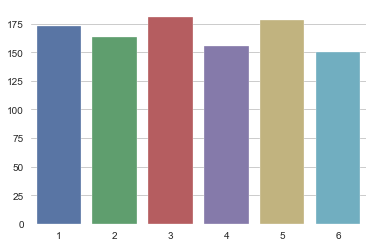

In [67]:
sns.barplot(x=list(x.keys()), y=list(x.values()))

#### Example 2 - Two dice, one thousand trials

In the second example here we simulate 2 dice being rolled 1000 times. The range of possible outcomes is now 2-12. We should also see a change in the distribution of values as now each value is no longer equally likely to occur. The values 2 and 12 are least likely to occur, they should only occur 1 time in 36 trials or 2.78% of the time. The value 7 should occur most often, 6 times per 36 trials or 16.67% of the time. What we should see is output that follows a normal distribution [15].

We use the Seaborn barplot function below to visualise the output of the 2 dice simulation. While there is some random variation, in general the central value of **7** occurs most often and each subsequent value occurs less often as you move away from 7 in each direction. This is the result we would expect and with a larger trial **n** we would expect to see less variation.

In [68]:
y = dicerolls(k=2, n=1000)

print(y)

{2: 36, 3: 63, 4: 75, 5: 122, 6: 125, 7: 183, 8: 134, 9: 103, 10: 80, 11: 49, 12: 30}


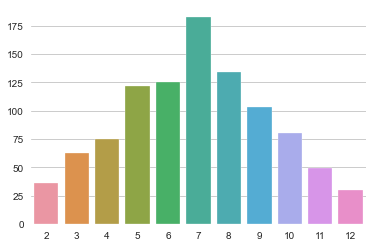

In [69]:
sns.barplot(x=list(y.keys()), y=list(y.values()))

#### Example 3 - 5 dice 10000 trials

In the final example here we increase the simulation to 5 dice being rolled 10000 times. We must increase the trials here to get an accurate picture of the result as the number of possible outcomes are 6x6x6x6x6 which is 7776. If we only did 1000 trials as in the previous examples the sample would not be reliable as it would be too small be considered representative of the overall distribution. 

The range of possible outcomes is now 5-30. The output should still, like the second example, follow a normal distribution around the central values 17 & 18 both of which should occur most often at 10.03% of the time. The outer limit values 5 and 30 will only occur 0.01% of the time, the rest of the possible outcomes should form the normal distribution as you move away from the central values to the outer limit values [16].

We use the Seaborn barplot function below to visualise the output of the 5 dice simulation. While there is some random variation. While again there is some random variation in general 17 & 18 will occur the most often and the rest of the values form a normal distribution reducing in occurrence as they move away from these central values. 

In [70]:
z = dicerolls(k=5, n=10000)

print(z)

{5: 2, 6: 8, 7: 16, 8: 42, 9: 88, 10: 153, 11: 267, 12: 379, 13: 540, 14: 720, 15: 816, 16: 939, 17: 1009, 18: 1018, 19: 934, 20: 847, 21: 672, 22: 549, 23: 387, 24: 292, 25: 157, 26: 95, 27: 44, 28: 13, 29: 13}


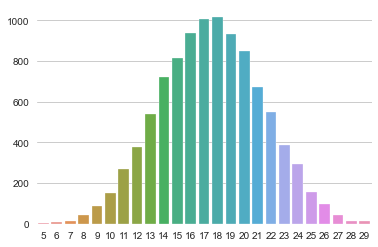

In [71]:
sns.barplot(x=list(z.keys()), y=list(z.values()))

***

<img style="float: left;" src="https://media1.tenor.com/images/507d58a626fa15cb0b57e57f7a1cb873/tenor.gif" alt="" />

# 3. Coin Flip
***
### Task: Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve

Before we start the simulation we must first import the external packages **numpy**, **seaborn** and **matplotlib** as all of those modules will be used to run the simulation and the generate the visualisation plot of the simulation data [11][17]. 

The style of the seaborn plots is set to **whitegrid** to improve plot readability [12].

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
sns.set_style("whitegrid")

#### Generating Data
***
Before we generate our simulations we initialise a random number generator object, **rng**, using the numpy.random Generator **default_rng** [18]. We also set a seed value, in this case we set the seed to 1234. While we want to get ransom results for this trial we want the results to be repeatable so that the results are the same for anyone who views the notebook. The seed means that everytime we run this code we will get the same result but we still get randomly generated data [39].

In [89]:
rng = np.random.default_rng(1234) # Generator rng

The Numpy **binomial** function generates data which follows the binomial distribution [19]. The binomial distribution describes the probability of a Boolean event (Yes/No) occurring (flipping a heads) within a given number of trials (100) with a fixed probability of the desired outcome occurring (50/50) [20]. 

```python
binomial(n, p, size=None)
```

The binomial function takes 2 mandatory variables **n and p** where n is the number of trials and p is the percentage chance of the desired outcome occurring [19]. In our case we want to run 100 tests of our coin flip `n=100` and we want to test a fair coin flip which means we have an exactly 50% chance of our desired outcome occurring `p=0.5`.

The function has a third option argument **size**. size dictates the number of samples we will draw for our output. Each sample will be equal to n trials. For our data we want to run the 100 flip trial 1000 times so `size=1000`.

To generate our data we call the binomial function and assign the variable **heads** to store our output. 

To check the data we print out the first 10 results of our output variable. We would expect most outcomes to be close to the expected mean of 50. As a second check we print the mean of the entire output, again we expect the actual mean to be very close to the expected mean 50.

In [75]:
heads = rng.binomial(n=100, p=0.5, size=1000)

print(heads[0:10])
print(heads.mean())

[55 52 53 41 53 46 45 43 54 48]
49.967


#### Visualising the data
***
We have chosen to use the Seaborn function **distplot()** to visualise our sample data. distplot is a good option as it allows us to plot a single variable, (heads), as both a **histogram**, which shows the distribution of the dataset, and a **Kernal Density Estimate (KDE)**, which represents what the dataset would resemble as a continuous probability curve [21, 22, 23].

**distplot** is highly customisable but as we don't have a complicated dataset we can keep the visualisation clear and concise by just using a basic plot. Here we call distplot on the array heads and we set the number of bins equal to the spread of the data set, largest value minus smallest value. After experimenting with different plots using the spread as the bin value seems to work better than having a fixed bin number or using the default bin rule that is used if **bins=None**. The spread adjusts automatically to the dataset its applied to [21].

#### Basic Statistics of the dataset

In [76]:
print(f"mean: {heads.mean()}")
print(f"standard deviation: {round(np.std(heads),3)}")
print(f"max: {heads.min()} min {heads.max()}")
print(f"spread: {heads.max()-heads.min()}")


mean: 49.967
standard deviation: 4.979
max: 36 min 69
spread: 33


The plot below shows a visualisation of the dataset **heads**. As we expected it resembles a normal distribution with the values centering around a mean of roughly 50 and occurring less often the further we get from that central value. From our basic statistics above we can see that the max and min values are very close to 3x the standard deviation away from the mean which would match up with the expected results of a normal distribution [24].

The KDE which represents what the data looks like estimated as a continuous curve shows a large peak around the mean and small tails which continue infinitely in both directions away from the mean.

Text(0.5, 1.0, 'Fig.1')

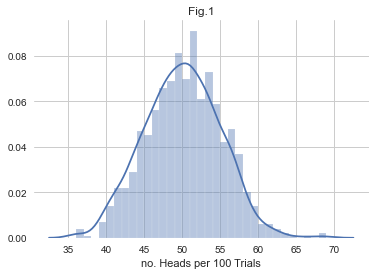

In [77]:
sns.distplot(heads, bins= heads.max() - heads.min())

plt.xlabel("no. Heads per 100 Trials")
plt.title("Fig.1")

#### Conclusion
***
From our analysis and the visual plot of the data we can conclude that the coin flip data does in fact follow a normal or gaussian distribution. 

We have our mean value of **49.967** and our standard deviation of **4.979**. We expect 99% of values to be within 3 standard deviations of the mean. In this case our mean +- stdev = `49.967 +- 14.937 = [35.03 & 64.904]`. As our min and max is 36 and 69 we can see that nearly all our values, apart from a single outier, fall within this range [40]. 

We can also see from our plot above, *Fig.1*, that our data visually follows the normal distribution's famous "bell shaped" curve. The values peak around the central value and reduce evenly as we move away towards the tails.


***

<img style="float: left;" src="https://mk0analyticsindf35n9.kinstacdn.com/wp-content/uploads/2018/12/simpsons-paradox.jpg" width=500 alt="" />

# 4. Simpson's paradox
***
### Task: Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox.

Simpson's Paradox is a statistical phenomenon where a trend that appears in a number of groups either disappears or reverses when the groups are combined. One of the best known occurrences of this paradox was described in a 1973 study of gender bias in Berkeley University but the phenomenon was described in other forms as early as 1899 [25].

Here we are going to attempt to recreate and visualise Simpson's Paradox using random data.

#### Generating Data
Before we start generating the data we must import the external libraries we are going to use. Here we are going to use **numpy** for generating and analysing data and **matplotlib's pyplot** module for plotting the data [17, 26].

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next we define a function **mkData** that we can re-use to make our initial data [1]. We want our data to be an array of **X** and **y** values. mkData takes 4 mandatory and one optional parameter and returns a numpy ndarray as its output [28].
```python
mkData(xstart: float, xstop: float, a: int, b: int, n=10)
```
First we generate the x values of the output array. We use the numpy linspace function to create an array with **n** number of values, each value is evenly spaced from **xstart** to **xstop** [29]. linspace is superior to pythons built in range function here as it allows us to use floating point numbers.

The **y** values are calculated as a function of the x values. In the case each y value is equal to the corresponding x value multiplied by the parameter **a** (slope) plus the parameter **b** (intercept) [30]. In an attempt mirror data found in the real world we add some random variation using the `np.random.normal()` method [31]. This means we wont be generating straight lines but our data should trend in a specific direction.

Now that we have two arrays for x and y we can combine them into a single 2-d array using np.asarray and assign that to our function return value.

In [79]:
def mkData(xstart: float, xstop: float, a: int, b: int, n=10) -> np.ndarray:
    x = np.linspace(xstart, xstop, num=n)
    
    y = (x * a) + b + np.random.normal(0, .7, len(x))
    
    return np.asarray((x, y))

Next we use the `mkData` funciton 4 times creating a, b, c and d arrays with different x and y values based on the inputs of the mkData function.

In [80]:
a = mkData(xstart=0, xstop=3, n=20, a=4, b=2)

b = mkData(xstart=1.5, xstop=4.5, n=20, a=2, b=-1)

c = mkData(xstart=3.5, xstop=7, n=20, a=1.5, b=-3)

d = mkData(xstart=6, xstop=9, n=20, a=1.2, b=-5)


#### Plotting Data
Next we set the plot style to the seaborn style. This is just for an improved look of the plot and doesn't affect the functionality [32]. 

In [81]:
plt.style.use("seaborn")

We use the pyplot scatter method to plot scatter plots of the x and y variables [33]. Each array is plotted individually with its name as label. We use the plt.legend method to show the labels making the variables easily identifiable.

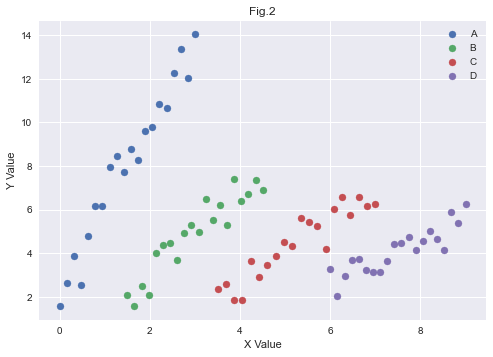

In [82]:
plt.scatter(a[0], a[1], label="A")
plt.scatter(b[0], b[1], label="B")
plt.scatter(c[0], c[1], label="C")
plt.scatter(d[0], d[1], label="D")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Fig.2")
plt.legend()

We can see in the above plot, **Fig.2**, that if we were to draw a best fit line for each variable, while they may have different sloped lines they would all have a positive slope [34]. There is a clear positive relationship between X and Y in all 4 variables.

#### Combining data
Next we want to combine our 4 data sets to look at the data in its entirety. We use the numpy concatenate function to combine the 4 variables X and Y values into the variables **x** and **y** which represent the whole data sets x and y values [35].

In [83]:
x = np.concatenate([a[0], b[0], c[0], d[0]])

In [84]:
y = np.concatenate([a[1], b[1], c[1], d[1]])

Now that we have the x and y values for the dataset we can calculate the best fit line for the data. Here we use the numpy function **polyfit**. We execute the polyfit function with 3 mandatory parameters [36]:

- **x**: array of x co-ordinates of the sample
- **y**: array of y co-ordinate of the sample
- **deg**: integer degree of polynomial fit, here we fit the polynomial to one degree with is linear regression [37].

polyfit returns a 2 value ndarray of regression coefficient (slope) and the constant value (intercept) for the linear regressions model [37]. We assign the outputs to the variables slope and intercept.

In [85]:
slope, intercept = np.polyfit(x, y, 1)
print(slope, intercept)

-0.19792922896764265 6.244974348754723


The above values allow us to plot an imaginary line the "best fits" the entire data set. 

Below in **Fig.3** we plot this line on it's own using the `pyplot.plot()` method. We can clearly see the negative slope of the line which indicates a negative relationship between X and Y which is the opposite of what we observed **Fig.2** above when each dataset is plotted individually [34].

Text(0.5, 1.0, 'Fig.3')

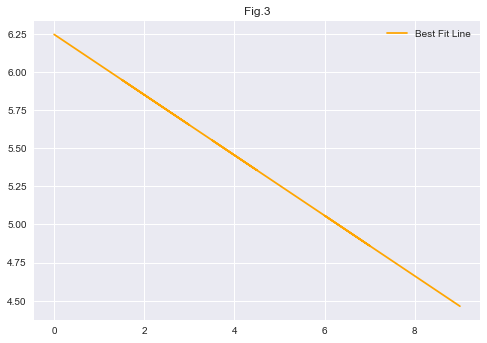

In [86]:
plt.plot(x, x * slope + intercept, label="Best Fit Line", color="orange")
plt.legend()
plt.title("Fig.3")

In **Fig.4** below we plot the entire dataset along with the best fit line we calculated earlier. From this plot alone we might conclude that there is a slight negative or no real significant relationship between x and y values. The data is spread in an almost random fashion.

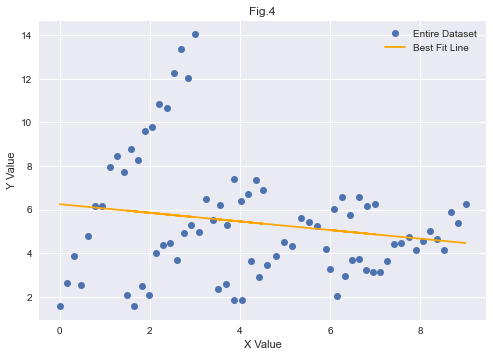

In [87]:
plt.plot(x, y, "o", label="Entire Dataset")
plt.plot(x, x * slope + intercept, label="Best Fit Line", color="orange")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Fig.4")
plt.legend()

Finally, in **Fig.5** we plot and label each individual dataset along with the calculated best fit line for the combined data. Here we can see that the best fit line does not accurately describe the characteristics of data.

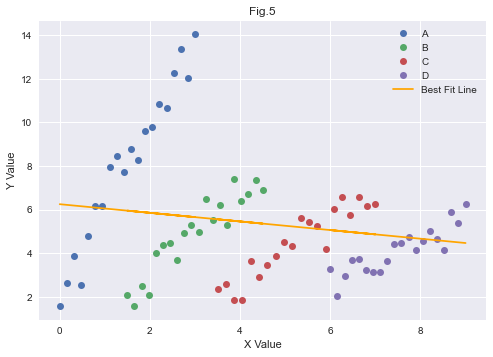

In [88]:
plt.plot(a[0], a[1], "o", label="A")
plt.plot(b[0], b[1], "o", label="B")
plt.plot(c[0], c[1], "o", label="C")
plt.plot(d[0], d[1], "o", label="D")
plt.plot(x, x * slope + intercept, label="Best Fit Line", color="orange")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("Fig.5")
plt.legend()

#### Conclusion
***
The above example shows the dangers of misinterpreting data. While we are interested in the relationship between variables X and Y, if we don't correctly investigate the data we might not recognise the effect of another variable, in this case the variable category (a, b, c and d). If we ignore this categorical data we may not get a complete picture of the data. 

If this was part of a medical trial where X was a dosage and Y was positive outcomes when we look at the data as a whole we might conclude that  increasing the dose has no effect on outcome or is slightly negatively correlated with good outcomes. But when we see the different classes of a, b, c and d we can clearly see that increasing X increases positive outcomes.

Appropriate experimental design and analysis is essential to identify and control for confounding variables and produce accurate and representative results [38]. This may be easier to do in clinical trials and assessments than it can may be when looking at naturally occurring real world data where it may be more difficult to identify an collect data for such confounding variables.

# References
***

1. w3schools. Python Functions. https://www.w3schools.com/python/python_functions.asp
2. Python.org, Built-in Types.https://docs.python.org/3/library/stdtypes.html#dict
3. Python.org, Errors and Exceptions. https://docs.python.org/3/tutorial/errors.html
4. GeeksforGeeks, (2018). Iterate over characters of a string in Python. https://www.geeksforgeeks.org/iterate-over-characters-of-a-string-in-python/
5. Lisa Tagliaferri, (2020). How To Convert Data Types in Python 3. https://www.digitalocean.com/community/tutorials/how-to-convert-data-types-in-python-3
6. programiz.com. Python String lower(). https://www.programiz.com/python-programming/methods/string/lower
7. Python.org. Sorting How To. https://docs.python.org/3/howto/sorting.html
8. w3schools. Python Lambda. https://www.w3schools.com/python/python_lambda.asp
9. Stack Overflow. How do I sort a dictionary by value? https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
10. python.org. random — Generate pseudo-random numbers. https://docs.python.org/3/library/random.html
11. seaborn.pydata.org. https://seaborn.pydata.org/introduction.html
12. seaborn.pydata.org. seaborn.set_style. https://seaborn.pydata.org/generated/seaborn.set_style.html
13. Fischer, Ismor (2016). Classical Probability Distributions. http://pages.stat.wisc.edu/~ifischer/Intro_Stat/Lecture_Notes/4_-_Classical_Probability_Distributions/4.1_-_Discrete_Models.pdf
14. seaborn.pydata.org. seaborn.barplot. https://seaborn.pydata.org/generated/seaborn.barplot.html
15. Holmes, Susan, (2000). stanford.edu. https://statweb.stanford.edu/~susan/courses/s60/split/node65.html
16. Any Dice. https://anydice.com/
17. Numpy.org. https://numpy.org/
18. Numpy.org. Random Generator. https://numpy.org/doc/stable/reference/random/generator.html
19. Numpy.org. numpy.random.Generator.binomial. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
20. Wikipedia. Binomial Distribution. https://en.wikipedia.org/wiki/Binomial_distribution
21. seaborn.pydata.org. seaborn.distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html
22. seaborn.pydata.org. seaborn.histplot. https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
23. seaborn.pydata.org. seaborn.kdeplot. https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
24. onlinestatbook.com. Areas Under Normal Distributions. http://onlinestatbook.com/2/normal_distribution/areas_normal.html
25. Wikipedia. Simpson's Paradox. https://en.wikipedia.org/wiki/Simpson%27s_paradox
26. matplotlib.org. matplotlib.pyplot. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
27. pandas.pydata.org. Pandas Documentation. https://pandas.pydata.org/docs/
28. Numpy.org. numpy.ndarray. https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
29. Numpy.org. numpy.linspace. https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
30. Pany, Ayush (2019) https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb
31. Numpy.org. numpy.random.normal. https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.normal.html
32. matplotlib.org. Customizing Matplotlib with style sheets and rcParams. https://matplotlib.org/tutorials/introductory/customizing.html
33. matplotlib.org. matplotlib.pyplot.scatter. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html
34. lumenlearning.com. Interpreting Slope. https://courses.lumenlearning.com/wm-macroeconomics/chapter/interpreting-slope/#:~:text=A%20positive%20slope%20means%20that,to%20right%2C%20the%20line%20rises.
35. Numpy.org. numpy.concatenate. https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
36. Numpy.org. numpy.polyfit. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
37. Mester, Tomi (2020). Linear Regression in Python using numpy + polyfit (with code base). https://data36.com/linear-regression-in-python-numpy-polyfit/
38. Ameringer, Suzanne (2009). Simpson's Paradox and Experimental Research. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2880329/
39. PYnative.com (2020). Python random.seed() function to initialize the pseudo-random number generator   https://pynative.com/python-random-seed/
40. Frost, Jim. Normal Distribution in Statistics. https://statisticsbyjim.com/basics/normal-distribution/